In [ ]:
# Cargar y preprocesar los datos
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

# Deep Learning 4 Capas Profundas

Epoch 10, Loss: 0.1312, Test Loss: 0.2699, Accuracy: 92.24%
Epoch 20, Loss: 0.0715, Test Loss: 0.2042, Accuracy: 94.09%
Epoch 30, Loss: 0.0544, Test Loss: 0.1710, Accuracy: 95.04%
Epoch 40, Loss: 0.0447, Test Loss: 0.1496, Accuracy: 95.59%
Epoch 50, Loss: 0.0374, Test Loss: 0.1346, Accuracy: 95.92%
Epoch 60, Loss: 0.0319, Test Loss: 0.1237, Accuracy: 96.21%
Epoch 70, Loss: 0.0270, Test Loss: 0.1154, Accuracy: 96.45%
Epoch 80, Loss: 0.0228, Test Loss: 0.1087, Accuracy: 96.52%
Epoch 90, Loss: 0.0198, Test Loss: 0.1034, Accuracy: 96.68%
Epoch 100, Loss: 0.0170, Test Loss: 0.0992, Accuracy: 96.88%
Epoch 110, Loss: 0.0149, Test Loss: 0.0958, Accuracy: 97.02%
Epoch 120, Loss: 0.0132, Test Loss: 0.0931, Accuracy: 97.05%
Epoch 130, Loss: 0.0117, Test Loss: 0.0909, Accuracy: 97.20%
Epoch 140, Loss: 0.0103, Test Loss: 0.0891, Accuracy: 97.26%
Epoch 150, Loss: 0.0090, Test Loss: 0.0877, Accuracy: 97.33%
Epoch 160, Loss: 0.0078, Test Loss: 0.0865, Accuracy: 97.40%
Epoch 170, Loss: 0.0068, Test Los

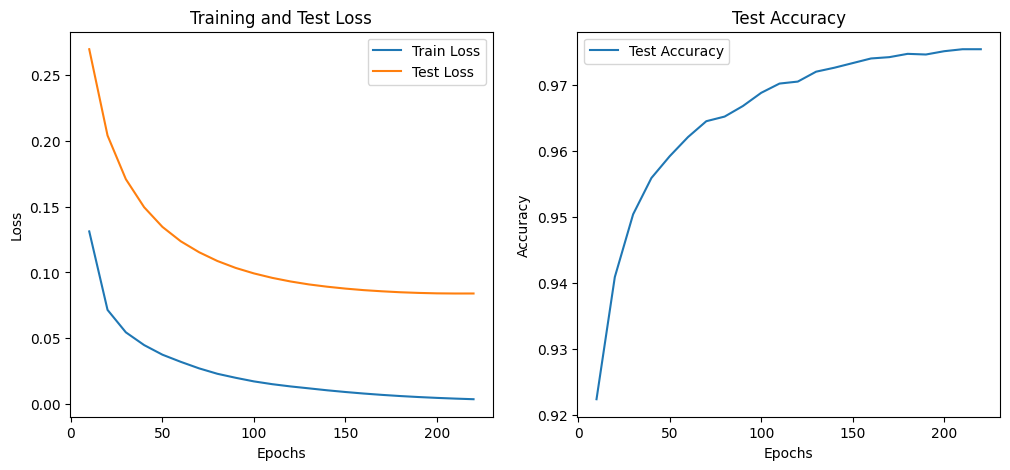

Accuracy en los datos de prueba: 97.54%


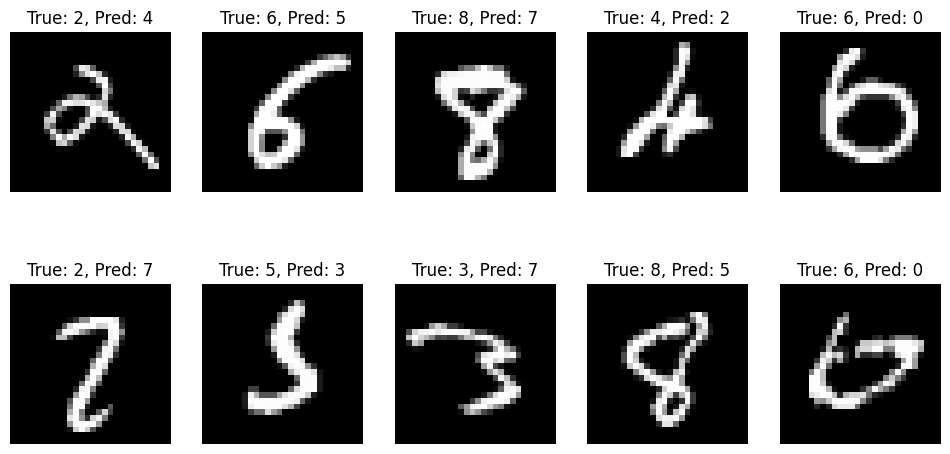

In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# Función para cargar imágenes
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Función para cargar etiquetas
def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Normalizar las imágenes (0-255 a 0-1)
def normalize_images(images):
    return images / 255.0

# Aplanar las imágenes (convertir de 28x28 a 784)
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

# Convertir etiquetas a formato one-hot
def to_categorical(labels, num_classes):
    return np.eye(num_classes)[labels]

# Inicialización de los parámetros de la red neuronal (ahora con 4 capas ocultas)
def initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size):
    np.random.seed(42)

    # Inicialización de pesos utilizando Xavier (Glorot)
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))

    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))

    W3 = np.random.randn(hidden_size2, hidden_size3) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, hidden_size3))

    W4 = np.random.randn(hidden_size3, hidden_size4) * np.sqrt(2. / hidden_size3)
    b4 = np.zeros((1, hidden_size4))

    W5 = np.random.randn(hidden_size4, output_size) * np.sqrt(2. / hidden_size4)
    b5 = np.zeros((1, output_size))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4, "W5": W5, "b5": b5}
    return parameters

# Función de activación Leaky ReLU (en lugar de ReLU)
def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

# Derivada de Leaky ReLU
def leaky_relu_derivative(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

# Función de activación Softmax
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Estabilización numérica
    return expZ / np.sum(expZ, axis=1, keepdims=True)

# Cálculo de la entropía cruzada
def cross_entropy_loss(Y, Y_hat):
    m = Y.shape[0]
    log_probs = -np.log(Y_hat[range(m), np.argmax(Y, axis=1)])
    loss = np.sum(log_probs) / m
    return loss

# Propagación hacia adelante (ahora con 4 capas ocultas y Leaky ReLU)
def forward_propagation(X, parameters, keep_prob=1):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    W5 = parameters["W5"]
    b5 = parameters["b5"]

    # Capa oculta 1 con Leaky ReLU
    Z1 = np.dot(X, W1) + b1
    A1 = leaky_relu(Z1)

    # Capa oculta 2 con Leaky ReLU
    Z2 = np.dot(A1, W2) + b2
    A2 = leaky_relu(Z2)

    # Capa oculta 3 con Leaky ReLU
    Z3 = np.dot(A2, W3) + b3
    A3 = leaky_relu(Z3)

    # Capa oculta 4 con Leaky ReLU
    Z4 = np.dot(A3, W4) + b4
    A4 = leaky_relu(Z4)

    # Capa de salida
    Z5 = np.dot(A4, W5) + b5
    A5 = softmax(Z5)

    # Dropout (opcional)
    if keep_prob < 1:
        D1 = (np.random.rand(*A1.shape) < keep_prob) / keep_prob
        D2 = (np.random.rand(*A2.shape) < keep_prob) / keep_prob
        D3 = (np.random.rand(*A3.shape) < keep_prob) / keep_prob
        D4 = (np.random.rand(*A4.shape) < keep_prob) / keep_prob
        A1 *= D1
        A2 *= D2
        A3 *= D3
        A4 *= D4

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3, "Z4": Z4, "A4": A4, "Z5": Z5, "A5": A5}
    return A5, cache

# Retropropagación (con 4 capas ocultas y Leaky ReLU)
def backpropagation(X, Y, parameters, cache):
    m = X.shape[0]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    W5 = parameters["W5"]

    # Recuperamos los valores de la cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    A4 = cache["A4"]
    A5 = cache["A5"]

    # Cálculo del gradiente de la capa de salida (softmax + cross entropy)
    dZ5 = A5 - Y
    dW5 = np.dot(A4.T, dZ5) / m
    db5 = np.sum(dZ5, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 4
    dZ4 = np.dot(dZ5, W5.T) * leaky_relu_derivative(A4)
    dW4 = np.dot(A3.T, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 3
    dZ3 = np.dot(dZ4, W4.T) * leaky_relu_derivative(A3)
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 2
    dZ2 = np.dot(dZ3, W3.T) * leaky_relu_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 1
    dZ1 = np.dot(dZ2, W2.T) * leaky_relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3, "dW4": dW4, "db4": db4, "dW5": dW5, "db5": db5}
    return grads

# Actualización de los parámetros
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    W5 = parameters["W5"]
    b5 = parameters["b5"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    dW4 = grads["dW4"]
    db4 = grads["db4"]
    dW5 = grads["dW5"]
    db5 = grads["db5"]

    # Actualización de los parámetros
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4
    W5 -= learning_rate * dW5
    b5 -= learning_rate * db5

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4, "W5": W5, "b5": b5}
    return parameters

# Función de entrenamiento con Batch Normalization y 4 capas ocultas
def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size, epochs, batch_size, learning_rate):
    parameters = initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size)
    test_loss_pre = 999
    test_loss = 9
    epoch = 0

    train_losses = []
    test_losses = []
    accuracies = []

    while test_loss < test_loss_pre:
        for i in range(0, X_train.shape[0], batch_size):
            # Mini-batch
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            # Propagación hacia adelante
            Y_hat, cache = forward_propagation(X_batch, parameters)

            # Calcular la pérdida
            loss = cross_entropy_loss(Y_batch, Y_hat)

            # Retropropagación
            grads = backpropagation(X_batch, Y_batch, parameters, cache)

            # Actualización de los parámetros
            parameters = update_parameters(parameters, grads, learning_rate)

        # Evaluación al final de cada época
        if (epoch + 1) % 10 == 0:
            test_loss_pre = test_loss
            Y_test_hat, _ = forward_propagation(X_test, parameters)
            test_loss = cross_entropy_loss(Y_test, Y_test_hat)

            # Calcular precisión
            predicted_labels = np.argmax(Y_test_hat, axis=1)
            true_labels = np.argmax(Y_test, axis=1)
            accuracy = np.mean(predicted_labels == true_labels)

            train_losses.append(loss)
            test_losses.append(test_loss)
            accuracies.append(accuracy)

            print(f'Epoch {epoch+1}, Loss: {loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

        epoch += 1

    # Graficar las pérdidas y precisión
    plt.figure(figsize=(12, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(range(10, len(train_losses)*10 + 1, 10), train_losses, label='Train Loss')
    plt.plot(range(10, len(test_losses)*10 + 1, 10), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(range(10, len(accuracies)*10 + 1, 10), accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy')
    plt.legend()

    plt.show()

    return parameters

# Evaluación del modelo en los datos de prueba
def evaluate(X_test, Y_test, parameters):
    Y_hat, _ = forward_propagation(X_test, parameters)
    predicted_labels = np.argmax(Y_hat, axis=1)
    true_labels = np.argmax(Y_test, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    print(f'Accuracy en los datos de prueba: {accuracy * 100:.2f}%')

    # Mostrar imágenes mal clasificadas
    misclassified_indexes = np.where(predicted_labels != true_labels)[0]

    # Mostrar algunas imágenes mal clasificadas
    plt.figure(figsize=(12, 6))
    for i in range(10):  # Mostrar las primeras 10 imágenes mal clasificadas
        index = misclassified_indexes[i]
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[index]}, Pred: {predicted_labels[index]}')
        plt.axis('off')
    plt.show()

# Cargar y preprocesar los datos
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

train_images = normalize_images(flatten_images(train_images))
test_images = normalize_images(flatten_images(test_images))

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Entrenar el modelo
parameters = train(train_images, train_labels, test_images, test_labels, 28*28, 256, 256, 256, 256, 10, epochs=150, batch_size=64, learning_rate=0.001)

# Evaluar el modelo test
evaluate(test_images, test_labels, parameters)



# Deep Learning 3 Capas Ocultas

Epoch 10/220, Loss: 0.3271, Test Loss: 0.3075, Test Accuracy: 91.11%
Epoch 20/220, Loss: 0.2477, Test Loss: 0.2394, Test Accuracy: 93.25%
Epoch 30/220, Loss: 0.2063, Test Loss: 0.2035, Test Accuracy: 94.32%
Epoch 40/220, Loss: 0.1779, Test Loss: 0.1793, Test Accuracy: 94.98%
Epoch 50/220, Loss: 0.1566, Test Loss: 0.1614, Test Accuracy: 95.38%
Epoch 60/220, Loss: 0.1398, Test Loss: 0.1474, Test Accuracy: 95.67%
Epoch 70/220, Loss: 0.1262, Test Loss: 0.1363, Test Accuracy: 96.08%
Epoch 80/220, Loss: 0.1149, Test Loss: 0.1272, Test Accuracy: 96.28%
Epoch 90/220, Loss: 0.1051, Test Loss: 0.1197, Test Accuracy: 96.44%
Epoch 100/220, Loss: 0.0967, Test Loss: 0.1133, Test Accuracy: 96.69%
Epoch 110/220, Loss: 0.0892, Test Loss: 0.1079, Test Accuracy: 96.80%
Epoch 120/220, Loss: 0.0826, Test Loss: 0.1032, Test Accuracy: 96.91%
Epoch 130/220, Loss: 0.0767, Test Loss: 0.0993, Test Accuracy: 97.00%
Epoch 140/220, Loss: 0.0713, Test Loss: 0.0958, Test Accuracy: 97.10%
Epoch 150/220, Loss: 0.0664, 

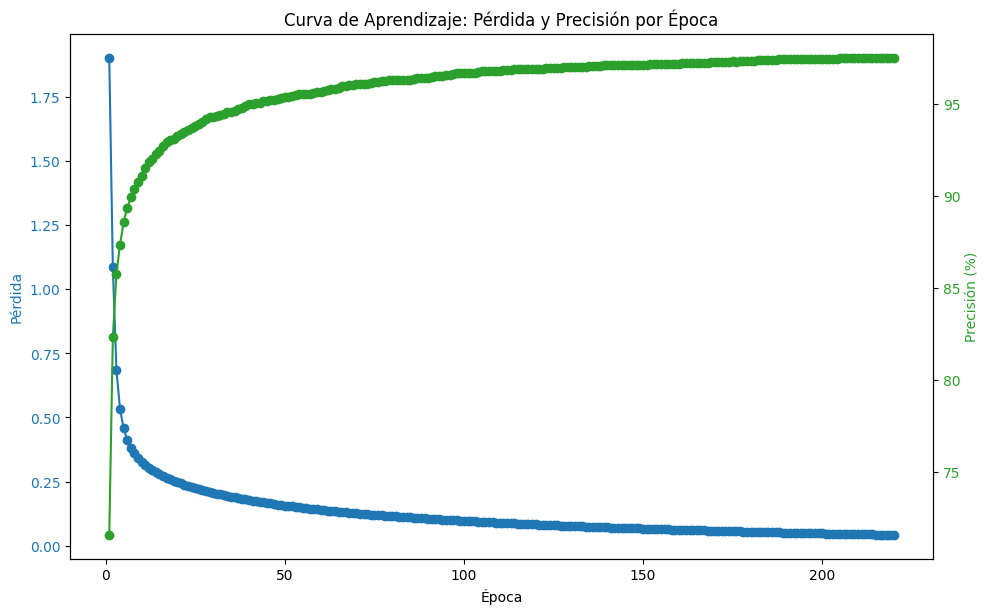

In [ ]:
import numpy as np
import struct

# Función para cargar imágenes
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Función para cargar etiquetas
def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Normalizar las imágenes (0-255 a 0-1)
def normalize_images(images):
    return images / 255.0

# Aplanar las imágenes (convertir de 28x28 a 784)
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

# Convertir etiquetas a formato one-hot
def to_categorical(labels, num_classes):
    return np.eye(num_classes)[labels]

# Inicialización de los parámetros de la red neuronal (ahora con 3 capas ocultas)
def initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    np.random.seed(42)  # Para reproducibilidad

    # Inicialización de pesos utilizando Xavier (Glorot)
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))

    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))

    W3 = np.random.randn(hidden_size2, hidden_size3) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, hidden_size3))

    W4 = np.random.randn(hidden_size3, output_size) * np.sqrt(2. / hidden_size3)
    b4 = np.zeros((1, output_size))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4}
    return parameters

# Función de activación Leaky ReLU (en lugar de ReLU)
def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

# Derivada de Leaky ReLU
def leaky_relu_derivative(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

# Función de activación Softmax
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Estabilización numérica
    return expZ / np.sum(expZ, axis=1, keepdims=True)

# Cálculo de la entropía cruzada
def cross_entropy_loss(Y, Y_hat):
    m = Y.shape[0]
    log_probs = -np.log(Y_hat[range(m), np.argmax(Y, axis=1)])
    loss = np.sum(log_probs) / m
    return loss

# Propagación hacia adelante (ahora con 3 capas ocultas y Leaky ReLU)
def forward_propagation(X, parameters, keep_prob=1):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    # Capa oculta 1 con Leaky ReLU
    Z1 = np.dot(X, W1) + b1
    A1 = leaky_relu(Z1)

    # Capa oculta 2 con Leaky ReLU
    Z2 = np.dot(A1, W2) + b2
    A2 = leaky_relu(Z2)

    # Capa oculta 3 con Leaky ReLU
    Z3 = np.dot(A2, W3) + b3
    A3 = leaky_relu(Z3)

    # Capa de salida
    Z4 = np.dot(A3, W4) + b4
    A4 = softmax(Z4)

    # Dropout (opcional)
    if keep_prob < 1:
        D1 = (np.random.rand(*A1.shape) < keep_prob) / keep_prob
        D2 = (np.random.rand(*A2.shape) < keep_prob) / keep_prob
        D3 = (np.random.rand(*A3.shape) < keep_prob) / keep_prob
        A1 *= D1
        A2 *= D2
        A3 *= D3

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3, "Z4": Z4, "A4": A4}
    return A4, cache

# Retropropagación (con 3 capas ocultas y Leaky ReLU)
def backpropagation(X, Y, parameters, cache):
    m = X.shape[0]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]

    # Recuperamos los valores de la cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    A4 = cache["A4"]

    # Cálculo del gradiente de la capa de salida (softmax + cross entropy)
    dZ4 = A4 - Y
    dW4 = np.dot(A3.T, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 3
    dZ3 = np.dot(dZ4, W4.T) * leaky_relu_derivative(A3)
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 2
    dZ2 = np.dot(dZ3, W3.T) * leaky_relu_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Gradientes para la capa oculta 1
    dZ1 = np.dot(dZ2, W2.T) * leaky_relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3, "dW4": dW4, "db4": db4}
    return grads

# Actualización de los parámetros
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    dW4 = grads["dW4"]
    db4 = grads["db4"]

    # Actualización de los parámetros
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4}
    return parameters

# Función de entrenamiento con Batch Normalization
import matplotlib.pyplot as plt

# Función de entrenamiento con Batch Normalization
def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, epochs, batch_size, learning_rate):
    parameters = initialize_parameters(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

    # Listas para almacenar las pérdidas y precisiones por época
    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        total_loss = 0  # Variable para almacenar la pérdida total en cada época

        for i in range(0, X_train.shape[0], batch_size):
            # Mini-batch
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            # Propagación hacia adelante
            Y_hat, cache = forward_propagation(X_batch, parameters)

            # Calcular la pérdida
            loss = cross_entropy_loss(Y_batch, Y_hat)
            total_loss += loss

            # Retropropagación
            grads = backpropagation(X_batch, Y_batch, parameters, cache)

            # Actualización de los parámetros
            parameters = update_parameters(parameters, grads, learning_rate)

        # Almacenar la pérdida promedio de la época
        avg_loss = total_loss / (X_train.shape[0] // batch_size)
        epoch_losses.append(avg_loss)

        # Evaluación de precisión en los datos de prueba
        Y_test_hat, _ = forward_propagation(X_test, parameters)
        predicted_labels = np.argmax(Y_test_hat, axis=1)
        true_labels = np.argmax(Y_test, axis=1)
        accuracy = np.mean(predicted_labels == true_labels)
        epoch_accuracies.append(accuracy)

        # Evaluación al final de cada época
        if (epoch + 1) % 10 == 0:
            test_loss = cross_entropy_loss(Y_test, Y_test_hat)
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%')

    return parameters, epoch_losses, epoch_accuracies


# Evaluación del modelo en los datos de prueba
def evaluate(X_test, Y_test, parameters):
    Y_hat, _ = forward_propagation(X_test, parameters)
    predicted_labels = np.argmax(Y_hat, axis=1)
    true_labels = np.argmax(Y_test, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    print(f'Accuracy en los datos de prueba: {accuracy * 100:.2f}%')

# Cargar y preprocesar los datos
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

train_images = normalize_images(flatten_images(train_images))
test_images = normalize_images(flatten_images(test_images))

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Entrenar el modelo y obtener las pérdidas y precisiones por época
parameters, epoch_losses, epoch_accuracies = train(
    train_images, train_labels, test_images, test_labels,
    28*28, 254, 254, 254, 10, epochs=220, batch_size=64, learning_rate=0.001
)

# Graficar la curva de aprendizaje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Pérdida
ax1.set_xlabel('Época')
ax1.set_ylabel('Pérdida', color='tab:blue')
ax1.plot(range(1, 221), epoch_losses, marker='o', color='tab:blue', label='Pérdida de entrenamiento')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Precisión
ax2 = ax1.twinx()  # Instanciar un segundo eje Y
ax2.set_ylabel('Precisión (%)', color='tab:green')
ax2.plot(range(1, 221), [acc * 100 for acc in epoch_accuracies], marker='o', color='tab:green', label='Precisión de prueba')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()  # Para que no se superpongan las etiquetas
plt.title('Curva de Aprendizaje: Pérdida y Precisión por Época')
plt.show()
